In [208]:
import random
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.randint(0,8),random.randint(0,8)])
print(estimate_location_list)

accuracy_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        accuracy_list.append(1)
    else:
        accuracy_list.append(0)

print(accuracy_list)

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [2, 7], [0, 4], [8, 3], [7, 8], [2, 0], [6, 4], [4, 1], [8, 6], [2, 8], [6, 4], [1, 4], [3, 4], [2, 3], [4, 0], [8, 7], [7, 7], [7, 7], [4, 8], [2, 6], [2, 2], [8, 3], [4, 4], [6, 0], [2, 2], [3, 2], [3, 8], [6, 8], [7, 5], [8, 4], [0, 5], [3, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]


/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/1187345789.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


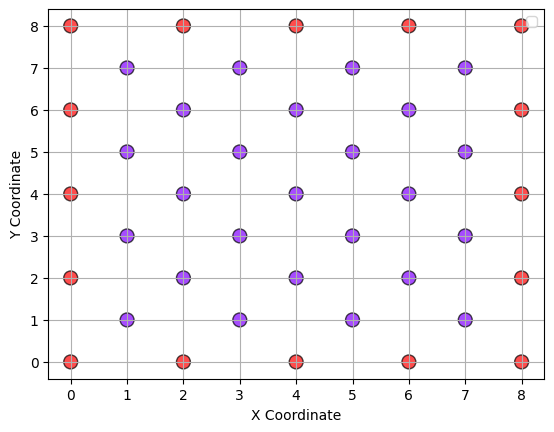

In [209]:

# visualize the nodes
import matplotlib.pyplot as plt
import numpy as np
# Extract x and y coordinates
truth_x, truth_y = zip(*truth_location_list)
estimate_x, estimate_y = zip(*estimate_location_list)

# Plot
plt.figure(facecolor='white')
scatter = plt.scatter(truth_x, truth_y, c=accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7)
# plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')

# plt.colorbar(scatter, label='Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
# plt.title('Estimated vs True Locations with Accuracy as Color')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/1392067828.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


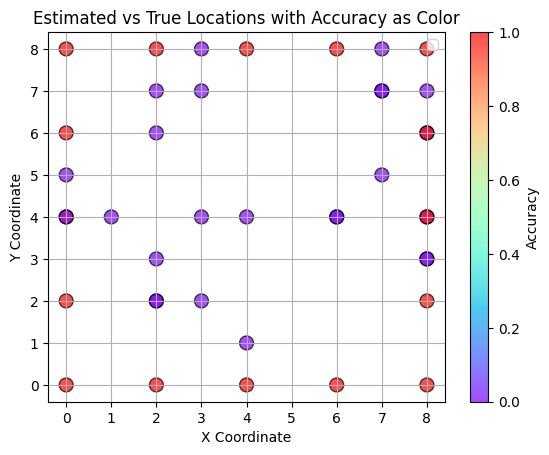

In [210]:
# visualize the nodes
import matplotlib.pyplot as plt
import numpy as np
# Extract x and y coordinates
truth_x, truth_y = zip(*truth_location_list)
estimate_x, estimate_y = zip(*estimate_location_list)

# Plot
# plt.figure(figsize=(10, 8))
scatter = plt.scatter(estimate_x, estimate_y, c=accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7)
# plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')

plt.colorbar(scatter, label='Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Estimated vs True Locations with Accuracy as Color')
plt.legend()
plt.grid(True)
plt.show()

In [211]:
import scipy.optimize as opt
# Multilateration function using least squares
def multilaterate(neighbors):
    def error_function(x, neighbors):
        return sum((np.linalg.norm(x - np.array(neighbor[0])) - neighbor[1])**2 for neighbor in neighbors)
    
    if len(neighbors) < 3:
        return None  # Not enough neighbors to perform multilateration
    
    initial_guess = np.mean([neighbor[0] for neighbor in neighbors], axis=0)
    result = opt.minimize(error_function, initial_guess, args=(neighbors,))
    
    if result.success:
        return result.x
    else:
        return None

1. use absolute distance for estimation and set accuracy to 1 with any calculation

In [212]:
import imageio
import copy

# prepare the lists
import random
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.uniform(0,8),random.uniform(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)

estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# plt.colorbar(scatter, label='Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_1.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

while np.average(estimated_accuracy_list) < 1:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] == 1:
                    neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # calculate the location with multilateration

        new_location = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            estimated_accuracy_list[idx] = 1

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop

    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    # plt.colorbar(scatter, label='Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_1.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

# Create GIF
imageio.mimsave('location_estimation_1.gif', frames, duration=1000, loop=0)


print(estimate_location_list)
print(estimated_accuracy_list)

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [5.3476520171288, 1.4092836631104815], [1.2037176119751871, 6.281932119518177], [0.6697146841574124, 7.331062289441249], [0.6470483195559771, 3.0427782218018997], [2, 0], [1.2315190339755784, 0.030965500085729403], [1.1701888848489252, 5.106688079350005], [3.6774388323116565, 7.238433274112456], [2, 8], [4.216131489686722, 7.969335340676744], [4.725662154791877, 3.898711424130801], [2.618162503026344, 2.639167714175291], [2.335981685240741, 2.6771924387854718], [4, 0], [4.208506258149513, 3.6084493302464598], [1.8913470135275139, 2.824299257031938], [2.241099017042825, 3.3948493832226143], [4, 8], [2.8921367322497673, 0.16

/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/1171691283.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/1171691283.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/1171691283.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/1171691283.py:105: Deprec

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [0.999999988920719, 0.999999988920719], [0.9999992091703355, 3.0000007202108003], [0.9999992091699665, 4.999999241891362], [0.999999965275275, 6.999999965087842], [2, 0], [2.0000000362621106, 2.0000000362621106], [1.6676012222441614, 4.7988313776028155], [1.298458086375771e-07, 8.00000160917426], [2, 8], [3.0000007202111956, 0.9999992091714567], [0.9999990096941793, 1.0000017680541577], [0.99999985604293, 6.999999853681324], [3.0000007083871294, 7.00000077592622], [4, 0], [4.7988313559577875, 1.667601222338686], [4.136360506878744, 4.1363597540427675], [3.9999996639297812, 7.023744679510056], [4, 8], [4.999999241891362, 0.9999992091699665], [6.999999855268335, 0.9999998575990577], [6.999999642237742, 6.99999964361845], [4.999999253710978, 7.00000077592867], [6, 0], [8.00000160923102, 1.2984220853981814e-07], [7.0237458118539315, 3.9999999767633616], [8.000000059039833, 8.000000045125374], [6, 8], [6.999999965087842, 0.999999965275275], [7.000000

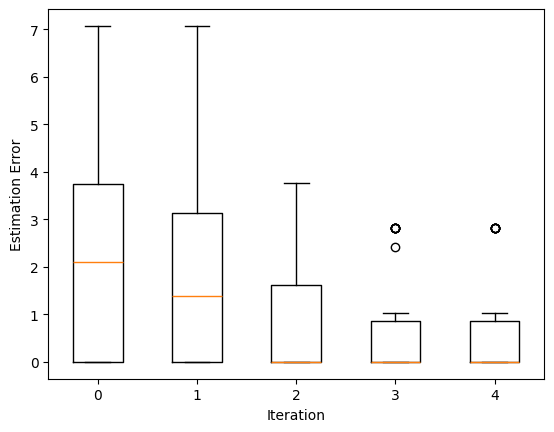

In [214]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.show()

2. use absolute distance for estimation and set accuracy to 1 with any calculation

In [215]:
# Multilateration function using least squares
def multilaterate(neighbors):
    def error_function(x, neighbors):
        return sum((np.linalg.norm(x - np.array(neighbor[0])) - neighbor[1])**2 for neighbor in neighbors)
    
    if len(neighbors) < 3:
        return None, None  # Not enough neighbors to perform multilateration
    
    initial_guess = np.mean([neighbor[0] for neighbor in neighbors], axis=0)
    result = opt.minimize(error_function, initial_guess, args=(neighbors,))
    
    if result.success:
        estimation_accuracy = 1 - np.sqrt(result.fun / len(neighbors))/np.mean([neighbor[1] for neighbor in neighbors])  # Root Mean Squared Error / Average Distance
        return result.x, estimation_accuracy
    else:
        return None, None

In [216]:
import imageio
import copy

# prepare the lists
import random
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.uniform(0,8),random.uniform(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_2.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 0.00001
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.9:
                    neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_2.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_2.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1.5713535161658143, 0.36344870070251556], [7.240464284701817, 5.551537010006763], [5.488109167919952, 2.387033112169335], [7.067746690078074, 7.506461191634948], [2, 0], [3.2633509878603313, 2.5575586027115556], [5.657800272895128, 0.2837564154784813], [1.2845114379316183, 6.252448508224947], [2, 8], [0.4288691246630085, 5.11160044099177], [5.122285228363904, 0.9816366045589611], [2.954404268518216, 6.746961712139018], [2.735361791417411, 6.477823197639598], [4, 0], [0.05136381358534159, 1.4113645325400457], [2.8569462242010433, 2.2013678050744723], [6.628600146197612, 6.146925880337039], [4, 8], [2.0644801048976538, 2.30

/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/983841818.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/983841818.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/983841818.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/983841818.py:115: Deprecati

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [0.999999988920719, 0.999999988920719], [7.240464284701817, 5.551537010006763], [5.488109167919952, 2.387033112169335], [0.999999965275275, 6.999999965087842], [2, 0], [3.2633509878603313, 2.5575586027115556], [5.657800272895128, 0.2837564154784813], [1.2845114379316183, 6.252448508224947], [2, 8], [0.4288691246630085, 5.11160044099177], [5.122285228363904, 0.9816366045589611], [2.954404268518216, 6.746961712139018], [2.735361791417411, 6.477823197639598], [4, 0], [0.05136381358534159, 1.4113645325400457], [2.8569462242010433, 2.2013678050744723], [6.628600146197612, 6.146925880337039], [4, 8], [2.0644801048976538, 2.3048402664764582], [1.76309256445679, 6.0901297448852], [1.032580379942953, 7.642706080701238], [3.7003685809890303, 2.064479213434259], [6, 0], [2.4786151103017557, 1.4945175579403207], [7.542458426219347, 1.2951705660654245], [4.215535742313134, 3.738079686081468], [6, 8], [6.999999965087842, 0.999999965275275], [5.163246553055957

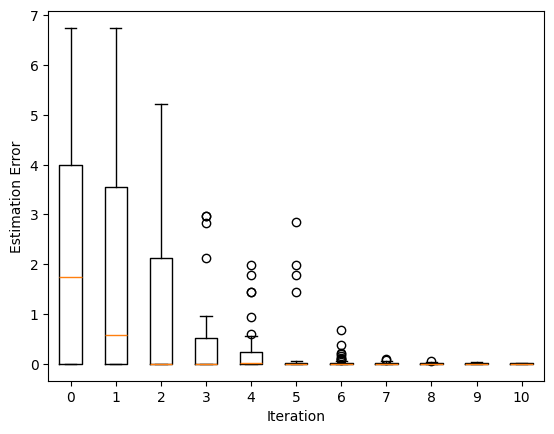

In [217]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.show()

In [228]:
import imageio
import copy

# prepare the lists
import random
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.uniform(0,8),random.uniform(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_3.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.3  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev)  # Add noise to the distance
                    neighbor_list.append([estimate_location_list[i], noisy_distance])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_3.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_3.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [4.1218080319096355, 0.24222930403909881], [5.25769886536633, 2.9174978453333704], [6.952664128041607, 0.9704357911647348], [7.270486861754418, 1.819310020547987], [2, 0], [6.044590724930322, 2.6450038902954605], [2.8752176386860855, 2.3333614159377207], [1.827107016133688, 6.331497815128438], [2, 8], [7.55124129642937, 2.2738004790323814], [5.64914489621393, 7.782125350652357], [0.24847735668894888, 3.546789179524634], [0.4967471892853679, 0.957898709814204], [4, 0], [7.850308462028917, 0.6026006117132923], [2.929320298098471, 2.1439145960722508], [3.128758257143571, 2.3364546570154925], [4, 8], [5.455980813462648, 2.4960

/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/3745673185.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/3745673185.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/3745673185.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/3745673185.py:119: Depre

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [0.867824750702277, 1.291207786382117], [5.25769886536633, 2.9174978453333704], [6.952664128041607, 0.9704357911647348], [0.9705221243776762, 7.08208481496914], [2, 0], [6.044590724930322, 2.6450038902954605], [2.8752176386860855, 2.3333614159377207], [1.827107016133688, 6.331497815128438], [2, 8], [7.55124129642937, 2.2738004790323814], [5.64914489621393, 7.782125350652357], [0.24847735668894888, 3.546789179524634], [0.4967471892853679, 0.957898709814204], [4, 0], [7.850308462028917, 0.6026006117132923], [2.929320298098471, 2.1439145960722508], [3.128758257143571, 2.3364546570154925], [4, 8], [5.455980813462648, 2.4960623910900654], [7.171589097751949, 1.7960533738320823], [4.294883795922817, 0.8886306611073751], [3.8929087805620366, 0.6623994009600347], [6, 0], [0.5405489713253768, 3.5854334642525094], [2.2621779395358104, 5.181309012747318], [6.739379174983318, 6.749463700284349], [6, 8], [6.601335573089581, 1.2138818253200876], [5.1239191370

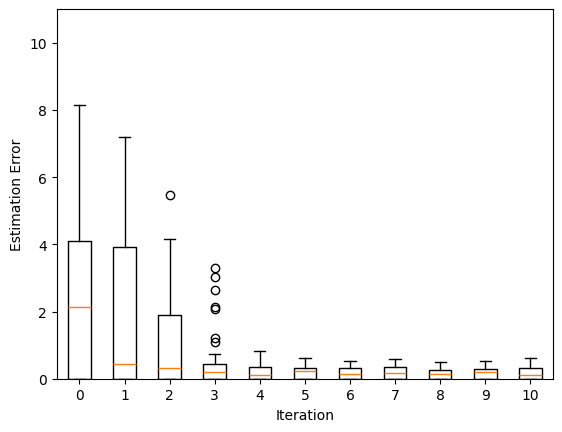

In [230]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 11)
plt.show()

In [220]:
import imageio
import copy

# prepare the lists
import random
truth_location_list = []
for i in range(0,9):
    for j in range(0,9):
        if i%2==0 and j%2==0:
            truth_location_list.append([i,j])
        if i%2==1 and j%2==1:
            truth_location_list.append([i,j])
print(truth_location_list)

# set random location between 0 and 9 for x and y 
estimate_location_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimate_location_list.append(truth_location_list[i])
    else:
        estimate_location_list.append([random.uniform(0,8),random.uniform(0,8)])
print(estimate_location_list)

estimated_accuracy_list = []
for i in range(len(truth_location_list)):
    if 0 in truth_location_list[i] or 8 in truth_location_list[i]:
        estimated_accuracy_list.append(1)
    else:
        estimated_accuracy_list.append(0)

print(estimated_accuracy_list)
dummy_accuracy_list = [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Prepare for GIF creation
frames = []

# Update estimate locations until accuracy is achieved
iteration = 0

# Visualization for each loop
plt.figure(figsize=(10, 8),facecolor='white')
estimate_x, estimate_y = zip(*estimate_location_list)
scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
# scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
plt.colorbar(scatter, label='Estimated Accuracy')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Iteration {iteration}')
plt.legend()
plt.grid(True)

# Save frame
filename = f'frame_{iteration}_4.png'
plt.savefig(filename)
frames.append(imageio.imread(filename))
plt.close()
iteration += 1

max_error = 1
noise_std_dev = 0.1  # Standard deviation of the noise to add to the distance
estimation_error = []
estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))

while np.average(estimated_accuracy_list) < 1 and iteration <= 10:
    estimate_location_list_old = copy.deepcopy(estimate_location_list)
    estimated_accuracy_list_old = copy.deepcopy(estimated_accuracy_list)
    for idx, node_location in enumerate(truth_location_list):

        if estimated_accuracy_list_old[idx] == 1:
            continue

        neighbor_list = [] # location, distance

        # find neighbors
        for i in range(len(truth_location_list)):
            if np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i])) <= 2 and node_location != truth_location_list[i]:
                # only add neighbors that are accurate
                if estimated_accuracy_list_old[i] >= 0.25:
                    distance = np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))
                    noisy_distance = distance + np.random.normal(0, noise_std_dev * (distance**2))  # Add noise to the distance
                    neighbor_list.append([estimate_location_list[i], noisy_distance])
                    # neighbor_list.append([estimate_location_list[i],np.linalg.norm(np.array(node_location) - np.array(truth_location_list[i]))])
        
        # Calculate the location with multilateration
        new_location, estimation_accuracy = multilaterate(neighbor_list)
        if new_location is not None:
            estimate_location_list[idx] = new_location.tolist()
            # Calculate accuracy as the inverse of RSS (lower RSS means higher accuracy)
            estimated_accuracy_list[idx] = max(0, estimation_accuracy)

    if estimate_location_list_old == estimate_location_list:
        break  # No updates, break the loop
    
    estimation_error.append(list(np.linalg.norm(np.array(estimate_location_list[i]) - np.array(truth_location_list[i])) for i in range(len(truth_location_list))))


    # Visualization for each loop
    plt.figure(figsize=(10, 8),facecolor='white')
    estimate_x, estimate_y = zip(*estimate_location_list)
    # truth_x, truth_y = zip(*truth_location_list)
    # color should be red if accuracy is 1, otherwise blue
    

    scatter = plt.scatter(estimate_x, estimate_y, c=estimated_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)
    # scatter = plt.scatter(estimate_x, estimate_y, c=dummy_accuracy_list, cmap='rainbow', s=100, edgecolors='k', alpha=0.7, vmin=0, vmax=1)


    # plt.scatter(truth_x, truth_y, color='black', marker='x', s=100, label='True Locations')
    plt.colorbar(scatter, label='Estimated Accuracy')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(f'Iteration {iteration}')
    plt.legend()
    plt.grid(True)

    # Save frame
    filename = f'frame_{iteration}_4.png'
    plt.savefig(filename)
    frames.append(imageio.imread(filename))
    plt.close()
    iteration += 1

    print(estimate_location_list)
    print(estimated_accuracy_list)

# Create GIF
imageio.mimsave('location_estimation_4.gif', frames, duration=1000, loop=0)


[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [1, 1], [1, 3], [1, 5], [1, 7], [2, 0], [2, 2], [2, 4], [2, 6], [2, 8], [3, 1], [3, 3], [3, 5], [3, 7], [4, 0], [4, 2], [4, 4], [4, 6], [4, 8], [5, 1], [5, 3], [5, 5], [5, 7], [6, 0], [6, 2], [6, 4], [6, 6], [6, 8], [7, 1], [7, 3], [7, 5], [7, 7], [8, 0], [8, 2], [8, 4], [8, 6], [8, 8]]
[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [4.257195684794462, 7.552990003009695], [4.483100283893603, 7.787331527829952], [7.171781109976376, 1.6135334701397221], [7.863979398988313, 0.44440877176103477], [2, 0], [6.687689344894344, 1.6231594380108376], [0.8117776195003179, 0.23367150064517084], [5.352440362863123, 2.6728887206819882], [2, 8], [2.557543971466541, 3.2924095900811556], [6.78048124653954, 2.9399367040301927], [7.1408425218381675, 0.02565246180089442], [6.2572052923770825, 3.2359254518202905], [4, 0], [6.644691534987388, 0.4071885022459103], [0.6951803303778288, 1.6022537538976067], [4.300520808422252, 0.12879499106651515], [4, 8], [6.256539296866816,

/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/2235396344.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/2235396344.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imageio.imread(filename))
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/2235396344.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/j4/pbwqtc3x6f964s_k6q48jskh0000gn/T/ipykernel_81633/2235396344.py:119: Depre

[[0, 0], [0, 2], [0, 4], [0, 6], [0, 8], [0.6369726339658309, 0.9601110066609542], [4.483100283893603, 7.787331527829952], [7.171781109976376, 1.6135334701397221], [0.9204994557595669, 7.029264125972968], [2, 0], [6.687689344894344, 1.6231594380108376], [0.8117776195003179, 0.23367150064517084], [5.352440362863123, 2.6728887206819882], [2, 8], [2.557543971466541, 3.2924095900811556], [6.78048124653954, 2.9399367040301927], [7.1408425218381675, 0.02565246180089442], [6.2572052923770825, 3.2359254518202905], [4, 0], [6.644691534987388, 0.4071885022459103], [0.6951803303778288, 1.6022537538976067], [4.300520808422252, 0.12879499106651515], [4, 8], [6.256539296866816, 0.7553664862139264], [5.3415747175940655, 7.1557723400706745], [1.6714066796249565, 5.539660965285617], [1.3477474085765184, 7.188385016419262], [6, 0], [4.6867171759504895, 4.742927282689931], [7.387347113253144, 6.853413254005434], [5.11761751334488, 4.4405481119751], [6, 8], [7.105293966709598, 0.9869614931893438], [7.2555

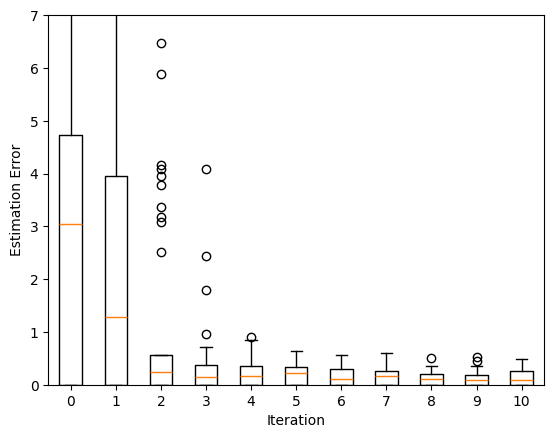

In [221]:
plt.figure(facecolor='white')
plt.boxplot(estimation_error)
plt.xticks(ticks=np.arange(1, len(estimation_error)+1), labels=np.arange(0, len(estimation_error)))
plt.xlabel('Iteration')
plt.ylabel('Estimation Error')
plt.ylim(0, 7)
plt.show()